In [36]:
import gym
env = gym.make("CarRacing-v1", continuous=False)


In [37]:
observation, info = env.reset(seed=42, return_info=True)
env.render()

True

In [38]:
all_speeds = []

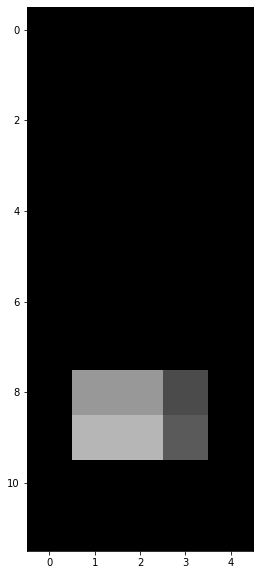

In [71]:
#action = env.action_space.sample()
action = 3
observation, reward, done, info = env.step(action)

if done:
    print("Done!")
    observation, info = env.reset(return_info=True)

env.render()
speed = observation[-12:,11:11+5,:]
plt.imshow(speed);

all_speeds.append(speed)

## Pixel Calculations

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Image Config
matplotlib.rcParams['figure.figsize'] = (20, 10)

### Speed Calculations

In [9]:
#np.save('speeds.npy', all_speeds, allow_pickle=True)
all_speeds = np.load('speeds.npy', allow_pickle=True)

In [10]:
# Initialize last speed
last_speed = all_speeds[0]

speed_dict = [0]
speed_image_dict = [last_speed]

for idx, sp in enumerate(all_speeds[1:]):
    if not (sp == last_speed).all():
        speed_dict.append(idx+1)
        speed_image_dict.append(sp)

        # Update Speed
        last_speed = sp

In [11]:
# Calculate Speed from pixels
def calculate_speed(input_img):
    for idx, sp_img in enumerate(speed_image_dict):
        if (input_img==sp_img).all():
            return speed_dict[idx]
       
    print("Error: Speed not found")
    return -1

In [86]:
len(speed_image_dict)

28

In [91]:
np.sum(speed_image_dict[20]!=0)

27

: 

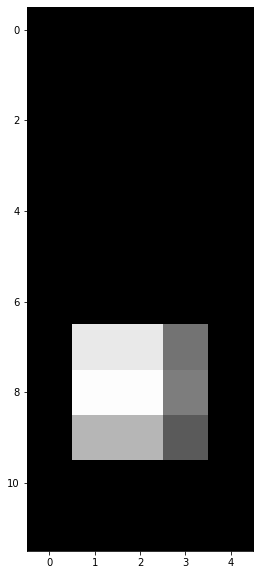

In [89]:
plt.imshow(speed_image_dict[20]);

### Sensors

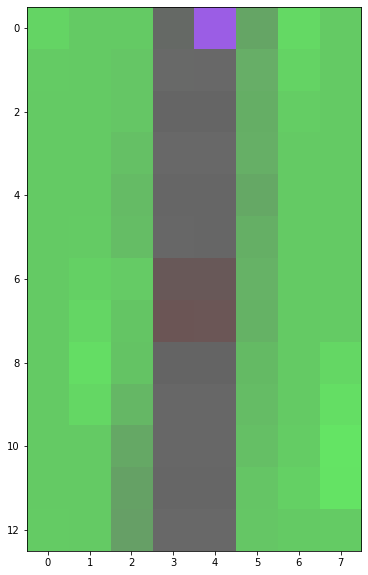

In [13]:
# Sensors
sensor_observation = observation.copy()

# Print Sensor Location
car_front = [65, 48]
sensor_observation[65, 48, 0] = 155
sensor_observation[65, 48, 1] = 93
sensor_observation[65, 48, 2] = 229

car = sensor_observation[65:78,44:52,:]

plt.imshow(car);

In [14]:
def is_road(pixel):
    if pixel[1]>pixel[0]*1.2 and pixel[1]>pixel[2]*1.2:
        # Not grey (probably?)
        return False
    else:
        return True

# Front Sensor
def get_front_sensor(observation, car_front):
    for i in range(car_front[0]):

        pixel = observation[car_front[0]-i, car_front[1], :]
        if not is_road(pixel):
            return i
    return car_front[0]

# Front Left
def get_left_sensor(observation, car_front):
    for i in range(car_front[0]):

        pixel = observation[car_front[0]-i, car_front[1]-i//4, :]
        if not is_road(pixel):
            return i
    return car_front[0]

# Front Right
def get_right_sensor(observation, car_front):
    for i in range(car_front[0]):

        pixel = observation[car_front[0]-i, car_front[1]+i//4, :]
        if not is_road(pixel):
            return i
    return car_front[0]

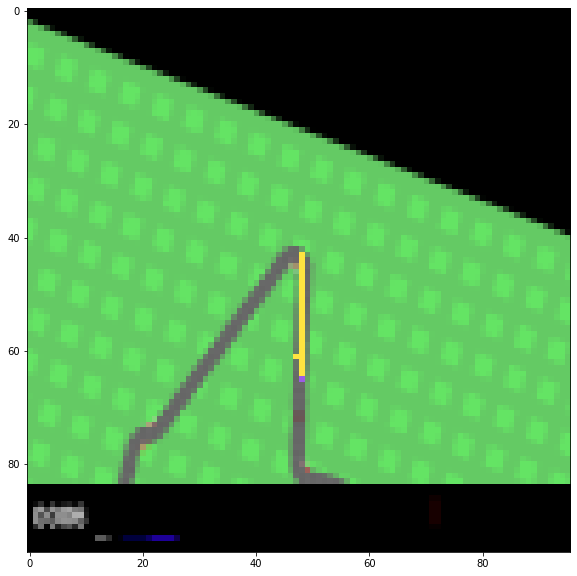

In [15]:
for i in range(1, get_front_sensor(observation, car_front)):
    sensor_observation[car_front[0]-i, car_front[1], 0] = 254
    sensor_observation[car_front[0]-i, car_front[1], 1] = 228
    sensor_observation[car_front[0]-i, car_front[1], 2] = 64

for i in range(1, get_left_sensor(observation, car_front)):
    sensor_observation[car_front[0]-i, car_front[1]-i//4, 0] = 254
    sensor_observation[car_front[0]-i, car_front[1]-i//4, 1] = 228
    sensor_observation[car_front[0]-i, car_front[1]-i//4, 2] = 64

for i in range(1, get_right_sensor(observation, car_front)):
    sensor_observation[car_front[0]-i, car_front[1]+i//4, 0] = 254
    sensor_observation[car_front[0]-i, car_front[1]+i//4, 1] = 228
    sensor_observation[car_front[0]-i, car_front[1]+i//4, 2] = 64

plt.imshow(sensor_observation);